In [43]:
import os
from pathlib import Path
import sys
import os
import _pickle as pickle
import json
import copy 
import pandas
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import csv
import json
from collections import Counter

In [44]:
with open('responseJudgement.json') as json_file:
    data = json.load(json_file)


In [45]:
nonverificationTasks = [x for x in data if x['Input.contextLen'] != '-1']

In [46]:
verificationTasks = [x for x in data if x['Input.contextLen'] == '-1']

In [47]:
len(verificationTasks)

0

In [5]:
verificationTasks[1]

{'HITId': '367O8HRHKIEQRLKL1GF6UGQ0U1AS4P',
 'HITTypeId': '3EAC8D5G64G8Y75P7FXTSOT4QKK6OX',
 'AssignmentId': '3RRCEFRB7PITXJ1DHWYDTABMFL9B4A',
 'WorkerId': 'A8XVXWYFFCRIW',
 'WorkTimeInSeconds': '391',
 'Input.fileName': 'badFile',
 'Input.localIndex': '-1',
 'Input.contextLen': '-1',
 'Input.fileIndex': '-1',
 'Answer.Correctness.Agree': 'false',
 'Answer.Correctness.Disagree': 'true',
 'Answer.Correctness.Neutral': 'false',
 'Answer.Correctness.Strongly Agree': 'false',
 'Answer.Correctness.Strongly Disagree': 'false',
 'Answer.Fluent.Agree': 'false',
 'Answer.Fluent.Disagree': 'true',
 'Answer.Fluent.Neutral': 'false',
 'Answer.Fluent.Strongly Agree': 'false',
 'Answer.Fluent.Strongly Disagree': 'false',
 'Answer.Interestingness.Agree': 'false',
 'Answer.Interestingness.Disagree': 'true',
 'Answer.Interestingness.Neutral': 'false',
 'Answer.Interestingness.Strongly Agree': 'false',
 'Answer.Interestingness.Strongly Disagree': 'false',
 'Answer.Logical.Agree': 'false',
 'Answer.Logic

In [6]:
correctness = []
fluent = []
interestingness = []
logical = []
quality = []
realness = []
usefulness = []

for task in verificationTasks:
    for key in task:
        if('Answer.Correctness' in key and task[key] == 'true'):
            correctness.append(key.split(".")[-1])
            
        if('Answer.Fluent' in key and task[key] == 'true'):
            fluent.append(key.split(".")[-1])
            
        if('Answer.Interestingness' in key and task[key] == 'true'):
            interestingness.append(key.split(".")[-1])
            
        if('Answer.Logical' in key and task[key] == 'true'):
            logical.append(key.split(".")[-1])
            
        if('Answer.Quality' in key and task[key] == 'true'):
            quality.append(key.split(".")[-1])
            
        if('Answer.Realness' in key and task[key] == 'true'):
            realness.append(key.split(".")[-1])
            
        if('Answer.Usefulness' in key and task[key] == 'true'):
            usefulness.append(key.split(".")[-1])
            


types = {
    'Correctness': correctness,
    'Fluent': fluent,
    'Interestingness': interestingness,
    'Logical': logical,
    'Quality': quality,
    'Realness': realness,
    'Usefulness': usefulness
         }

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/home/naman/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
labels = []
values = []
name = []
for k in types:
    vals = types[k]
    keys, counts = np.unique(vals, return_counts=True)
    labels.append(keys)
    values.append(counts)
    name.append(k)


In [9]:
for i in range(len(name)):
    print(name[i])
    print(labels[i])
    print(values[i])

Correctness
['Agree' 'Disagree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
[ 267  357  348   36 2166]
Fluent
['Agree' 'Disagree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
[ 570  345  695  329 1235]
Interestingness
['Agree' 'Disagree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
[  95  399  374   29 2277]
Logical
['Agree' 'Disagree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
[  57  425  250   14 2428]
Quality
['1 (Very Poor)' '2 (Poor)' '3 (Okay)' '4 (Good)' '5 (Very Good)']
[2363  394  303   97   17]
Realness
['Agree' 'Disagree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
[  83  472  530   67 2022]
Usefulness
['Agree' 'Disagree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
[  78  393  212    4 2487]


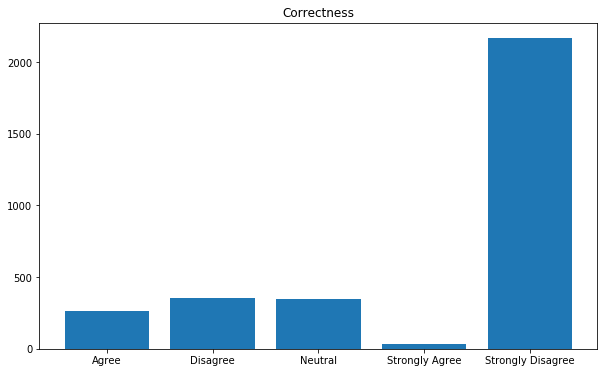

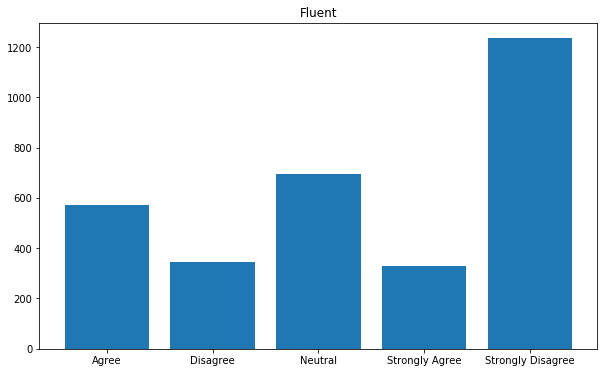

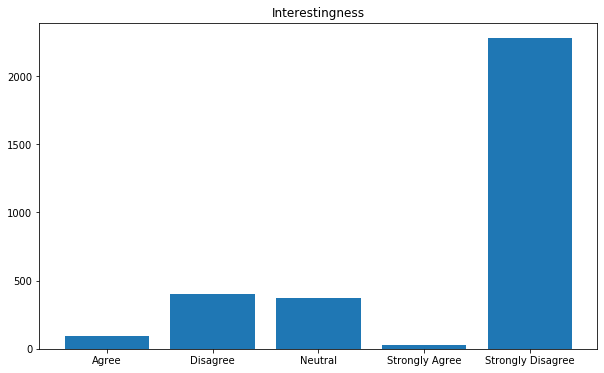

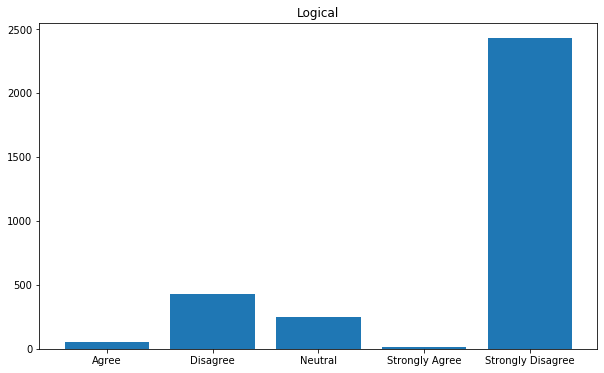

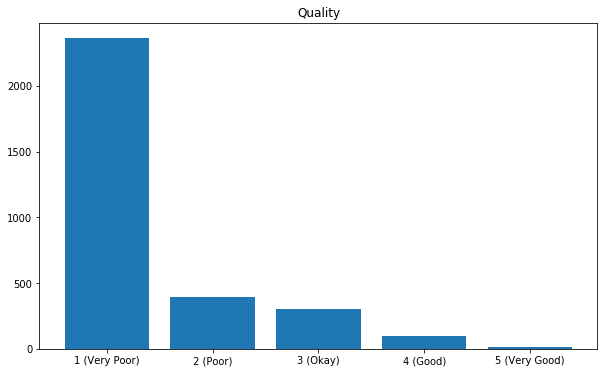

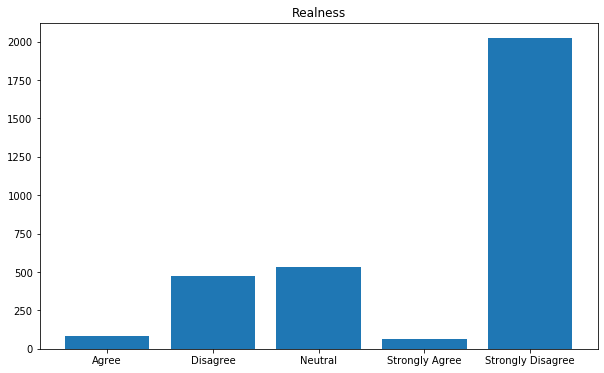

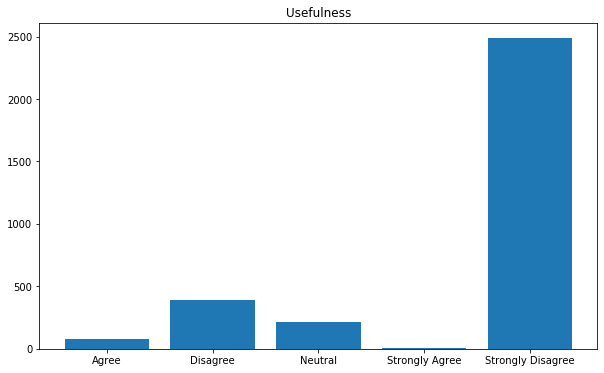

In [10]:
for i in range(len(name)):
    plt.bar(labels[i], values[i])
    plt.title(name[i])
    figName = name[i] + '.png'
    plt.savefig(figName)
    plt.show()

In [11]:
len(verificationTasks)

3174

In [12]:
filtered = [x for x in verificationTasks if (x['Answer.Usefulness.Strongly Disagree'] == 'true' or x['Answer.Usefulness.Disagree'] == 'true') and (x['Answer.Logical.Strongly Disagree'] == 'true'or x['Answer.Logical.Disagree'] == 'true') and (x['Answer.Quality.1 (Very Poor)'] == 'true' or x['Answer.Quality.2 (Poor)'] == 'true')]
len(filtered)

2710

In [13]:
len(filtered)


2710

In [14]:
goodHITs = []

In [15]:
for task in filtered:
    goodHITs.append(task['AssignmentId'])

In [16]:
len(set(goodHITs))

2710

In [132]:
resultFile = 'Batch_3980783_batch_results.csv'

with open(resultFile) as f:
    reader = csv.DictReader(f)
    rows = list(reader)

In [133]:
for row in rows:
    
    if row['AssignmentId'] not in goodHITs:
        row['Reject'] = 'x'

In [134]:
writeFile = 'Edit_' + resultFile

CSVFile = open(writeFile, 'w') 
csv_writer = csv.writer(CSVFile) 

header = rows[0].keys() 
csv_writer.writerow(header) 

for data in rows:
    csv_writer.writerow(data.values()) 
  
CSVFile.close() 

15867